<a href="https://colab.research.google.com/github/Hoyadeath/practice_AI/blob/main/2_06_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**데이터 스케일링(Data Scaling)**

sklearn의 5가지 스케일링 방법 숙지

sklearn의 breast cancer dataset 사용

In [ ]:
# 필요한 패키지 임포트
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()

In [ ]:
# 데이터셋을 dataframe 형태로 변환
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# 모델을 만들고 학습과 테스트를 거쳐 정확도를 출력 <- 스케일링 전
# DecisionTreeClassifier 사용

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=4301)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print('모델의 정확도 :', round(dtc.score(X_test, y_test), 4))

모델의 정확도 : 0.9211


**(1) StandardScaler()**

In [ ]:
# StandardScaler : 모든 변수들을 평균이 0, 분산이 1인 정규분포로 변환
  # 데이터 내에 이상치가 있을 경우 적절치 않음 (이상치가 데이터의 평균과 분산에 크게 영향을 주기 때문)

from sklearn.preprocessing import StandardScaler
# 훈련용 데이터셋과 테스트용 데이터셋에 각각 다른 과정이 필요
std = StandardScaler()
std.fit(X_train)  # 훈련용 데이터셋은 fit 메서드를 적용시킨 후 transform
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test) # 테스트용 데이터셋에는 transform 을 적용
dtc.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.9386


?? 모델의 정확도 상승???

In [ ]:
# 데이터를 통해 데이터값의 범위 변화 확인
X_train

array([[1.256e+01, 1.907e+01, 8.192e+01, ..., 9.265e-02, 2.121e-01,
        7.188e-02],
       [9.742e+00, 1.567e+01, 6.150e+01, ..., 5.159e-02, 2.841e-01,
        8.175e-02],
       [9.268e+00, 1.287e+01, 6.149e+01, ..., 1.025e-01, 3.038e-01,
        1.252e-01],
       ...,
       [8.950e+00, 1.576e+01, 5.874e+01, ..., 3.846e-02, 1.652e-01,
        7.722e-02],
       [1.916e+01, 2.660e+01, 1.262e+02, ..., 1.872e-01, 3.258e-01,
        9.720e-02],
       [1.940e+01, 1.818e+01, 1.272e+02, ..., 2.252e-01, 3.590e-01,
        7.787e-02]])

In [ ]:
X_train_scaled

array([[-0.43148061, -0.04064845, -0.4010277 , ..., -0.32560022,
        -1.24475893, -0.6594811 ],
       [-1.22052399, -0.83292702, -1.22924598, ..., -0.94928824,
        -0.10021727, -0.12205614],
       [-1.35324455, -1.48539173, -1.22965157, ..., -0.17598192,
         0.21294205,  2.24381157],
       ...,
       [-1.44228493, -0.81195494, -1.3411893 , ..., -1.14872866,
        -1.99030064, -0.36871623],
       [ 1.41652729,  1.71401556,  1.39493243, ...,  1.11058349,
         0.56266311,  0.71920177],
       [ 1.48372757, -0.24803902,  1.4354916 , ...,  1.68779111,
         1.09042398, -0.3333235 ]])

In [ ]:
# 그래프를 통해 명시적으로 확인
# numpy array 데이터 포맷이므로 전체를 열 1개로 바꾸어서 확인
X_train_scaled.shape

(455, 30)

In [ ]:
X_train_scaled_ss = X_train_scaled.reshape(13650,1)
X_train_data = X_train.reshape(13650,1)

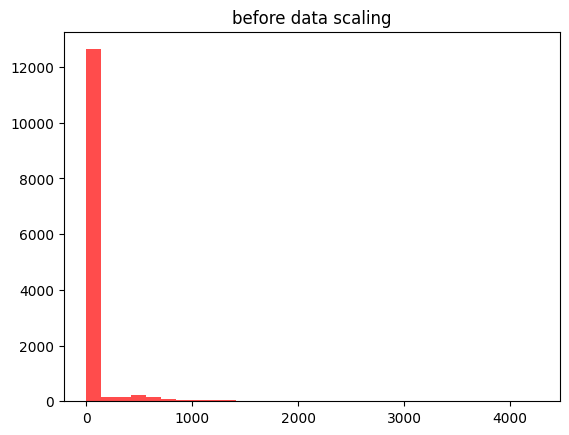

In [ ]:
# 스케일링 전의 훈련 데이터셋 분포
plt.hist(X_train_data, bins=30, color= 'red', alpha = 0.7)
plt.title('before data scaling')
plt.show()

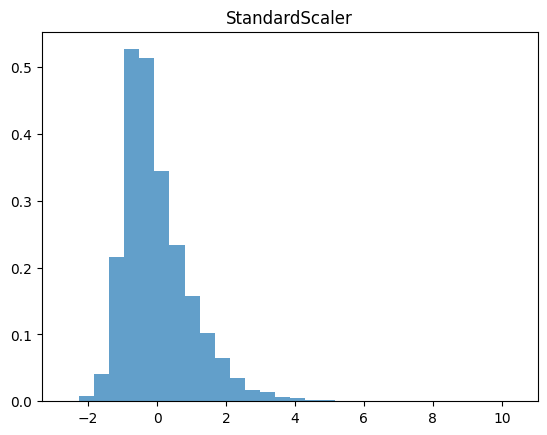

In [ ]:
# # 스케일링 후 분포
plt.hist(X_train_scaled_ss, bins=30, alpha = 0.7, density = True)
plt.title('StandardScaler')
plt.show()

**(2) MinMaxScaler()**

In [ ]:
# MinMaxScaler : 0과 1사이 값으로 스케일링
# 이 방법 역시 이상치가 존재한다면, 이상치가 영향으로 다른 데이터가 아주 좁은 범위에 분포하는 현상 발생
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
X_train_scaled = mms.transform(X_train)
X_test_scaled = mms.transform(X_test)
dtc.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.9123


# 위 (1) StandardScaler() 코드를 활용하여
<br> 1) 데이터 직접 확인
<br> 2) 그래프를 통하여 시각화 확인

In [ ]:
X_train_scaled.shape
X_train_scaled_mms = X_train_scaled.reshape(13650,1)
X_train_data = X_train.reshape(13650,1)

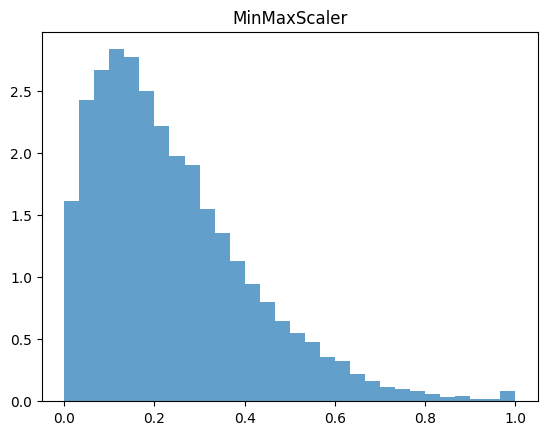

In [ ]:
# # 스케일링 후 분포
plt.hist(X_train_scaled_mms, bins=30, alpha = 0.7, density = True)
plt.title('MinMaxScaler')
plt.show()

**(3) MaxAbsScaler()**

In [ ]:
# MaxAbsScaler : MinMaxScaler와 유사. 모든 피처들의 절댓값이 0과 1 사이로 변환
# 0을 기준으로 절댓값이 가장 큰 수가 1또는 -1의 값을 가지게 됩니다.
# 이상치의 영향 있음

from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()
mas.fit(X_train)
X_train_scaled = mas.transform(X_train)
X_test_scaled = mas.transform(X_test)
dtc.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.9211


# 위 (1) StandardScaler() 코드를 활용하여
<br> 1) 데이터 직접 확인
<br> 2) 그래프를 통하여 시각화 확인

In [ ]:
X_train_scaled.shape
X_train_scaled_mas = X_train_scaled.reshape(13650,1)
X_train_data = X_train.reshape(13650,1)

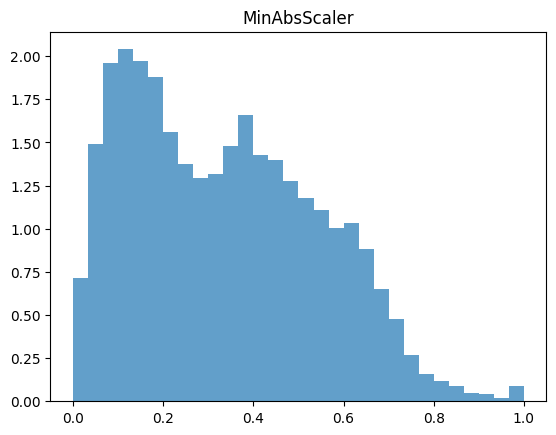

In [ ]:
# # 스케일링 후 분포
plt.hist(X_train_scaled_mas, bins=30, alpha = 0.7, density = True)
plt.title('MinAbsScaler')
plt.show()

**(4) RobustScaler()**

In [ ]:
# RobustScaler : RobustScaler는 중간값(median)과 사분위값(quartile)을 사용
# 이상치의 영향을 최소화
# StandardScaler(평균과 분산 사용) 와 유사, RobustScaler가 표준화 후 데이터가 더 넓은 분포를 보임

from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()
X_train_scaled = rbs.fit_transform(X_train)
X_test_scaled = rbs.transform(X_test)
dtc.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.9211


# 위 (1) StandardScaler() 코드를 활용하여
<br> 1) 데이터 직접 확인
<br> 2) 그래프를 통하여 시각화 확인

In [ ]:
X_train_scaled.shape
X_train_scaled_rbs = X_train_scaled.reshape(13650,1)
X_train_data = X_train.reshape(13650,1)

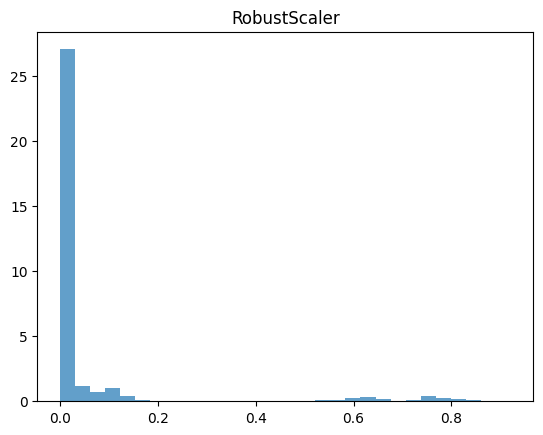

In [ ]:
# # 스케일링 후 분포
plt.hist(X_train_scaled_rbs, bins=30, alpha = 0.7, density = True)
plt.title('RobustScaler')
plt.show()

**(5) Normalizer()**

In [ ]:
# Normalizer : 각 행(row)마다 정규화가 진행
# cf) 앞의 4가지 방법은 각 피처(feature)의 통계치를 이용. 즉, 열(columns)를 대상으로 함.

# 이는 한 행의 모든 피처들 사이의 유클리드 거리가 1이 되도록 데이터값을 만듦.
# 빠른 학습 가능.  과대적합 확률을 낮춤


from sklearn.preprocessing import Normalizer

norm = Normalizer()
X_train_scaled = norm.fit_transform(X_train)
X_test_scaled = norm.transform(X_test)
dtc.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.9035


# 위 (1) StandardScaler() 코드를 활용하여
<br> 1) 데이터 직접 확인
<br> 2) 그래프를 통하여 시각화 확인

In [ ]:
X_train_scaled.shape
X_train_scaled_nz = X_train_scaled.reshape(13650,1)
X_train_data = X_train.reshape(13650,1)

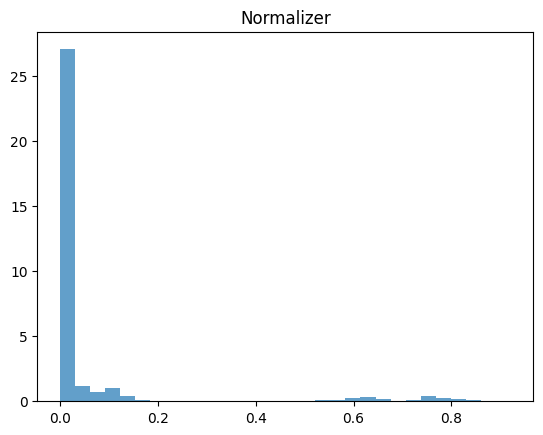

In [ ]:
plt.hist(X_train_scaled_nz, bins=30, alpha = 0.7, density = True)
plt.title('Normalizer')
plt.show()